# 1. Imports & Read in Data

In [1]:
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import pandas as pd
import re
import json
import csv

Zuerst müssen Daten in feather Dateiformart umgewandelt werden:

import pandas as pd

example_data = pd.read_csv(example_data.csv)

example_data.to_feather(example_data.feather)

In [3]:
file_path_asi = "data/Asien/asien_tripfile.feather" 
file_path_eur = "data/Europa/europa_tripfile.feather"
file_path_sud = "data/Suedamerika/sudamerika_tripfile.feather"

In [4]:
# Zum Einlesen von Beispieldaten im csv Format
#data = pd.read_csv(file_path, delimiter=';', quotechar='"', engine='python') 

# Zum Einlesen von vollständingen Daten im csv Format
#data = pd.read_csv("data/Asien/ABCD_tripfiles.csv" , delimiter=',', quotechar='"', engine='python', on_bad_lines='skip')

In [5]:
data = pd.read_feather(file_path_asi)

# 2. Data Analysis

Summary:
- dataset sorted by creation_time then id then flight_number
- id column is removed
- creation_time as index column
- removing the rows where all elements are missing
- removing header_line and entry_details column
- flight_number and flight_date were converted to int
- add country, city, airport name

In [6]:
data.head()

,id,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
0,33902381,2024-05-01 09:14:42,AB,2359.0,1.0,BLR,service-acco,ASMMsgProcessor,"2024-05-01 09:14:42,420 INFO [3f326d134d9de45...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
1,33910427,2024-05-01 10:28:12,AB,2104.0,2.0,BLR,service-acco,ASMMsgProcessor,"2024-05-01 10:28:12,745 INFO [de24be75947007f...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
2,33910380,2024-05-01 10:28:11,AB,2109.0,2.0,BLR,service-acco,ASMMsgProcessor,"2024-05-01 10:28:11,301 INFO [df3a1cc7d574161...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
3,33909790,2024-05-01 10:28:12,AB,2110.0,2.0,BOM,service-acco,ASMMsgProcessor,"2024-05-01 10:28:12,189 INFO [9e66dfb1ffe9048...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
4,33902706,2024-05-01 09:14:41,AB,2127.0,2.0,BOM,service-acco,ASMMsgProcessor,"2024-05-01 09:14:41,884 INFO [829566f527b588f...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."


In [7]:
data.tail()

,id,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
710055,33875192,2024-05-01 04:07:01,AB,2372.0,30.0,GAU,service-acco,StorePaxDataAction,"2024-05-01 04:07:01,675 INFO [90c6642a105b86f...",TOTAL Pax: 131 Y: 131 Jump: 0 StandBy: ...
710056,33875261,2024-05-01 04:08:01,AB,2372.0,30.0,GAU,service-acco,StorePaxDataAction,"2024-05-01 04:08:01,279 INFO [76f51797d6d0b42...",com.onesystem.lc2.paxactuals.dto.PaxDataDTO [ ...
710057,33875264,2024-05-01 04:08:01,AB,2372.0,30.0,GAU,service-acco,StorePaxDataAction,"2024-05-01 04:08:01,281 INFO [76f51797d6d0b42...",TOTAL Pax: 131 Y: 131 Jump: 0 StandBy: ...
710058,33875306,2024-05-01 04:09:01,AB,2372.0,30.0,GAU,service-acco,StorePaxDataAction,"2024-05-01 04:09:01,465 INFO [ef79e34fa812d85...",com.onesystem.lc2.paxactuals.dto.PaxDataDTO [ ...
710059,33875309,2024-05-01 04:09:01,AB,2372.0,30.0,GAU,service-acco,StorePaxDataAction,"2024-05-01 04:09:01,468 INFO [ef79e34fa812d85...",TOTAL Pax: 131 Y: 131 Jump: 0 StandBy: ...


In [8]:
data.shape

(710060, 10)

In [9]:
data.dtypes

id                    object
creation_time         object
airline_code          object
flight_number        float64
flight_date          float64
departure_airport     object
user_name             object
action_name           object
header_line           object
entry_details         object
dtype: object

In [10]:
# Convert creation_time to datetime, handling errors by setting them as NaT
data['creation_time'] = pd.to_datetime(data['creation_time'], errors='coerce')

In [11]:
data.sort_values(by=['creation_time', "id", "flight_number"], inplace=True)

In [12]:
# Set 'creation_time' as the index
data.set_index('creation_time', inplace=True)

In [13]:
data = data.drop(columns=['id'])

In [14]:
data.head(20)

,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
creation_time,,,,,,,,
2024-04-30 04:01:00,AB,2373.0,30.0,IXB,service-acco,CheckinMsgProcessor,"2024-04-30 04:01:00,878 INFO [82d2c409b5dec33...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<n:P..."
2024-04-30 04:01:00,AB,2373.0,30.0,IXB,service-acco,StorePaxDataAction,"2024-04-30 04:01:00,879 INFO [82d2c409b5dec33...",com.onesystem.lc2.paxactuals.dto.PaxDataDTO [ ...
2024-04-30 04:01:00,AB,2373.0,30.0,IXB,service-acco,CalculateWeightAndTrimAction,"2024-04-30 04:01:00,879 INFO [82d2c409b5dec33...",com.onesystem.lc2.common.dto.SingleAttributeDT...
2024-04-30 04:01:00,AB,2373.0,30.0,IXB,service-acco,CalculateWeightAndTrimAction,"2024-04-30 04:01:00,879 INFO [82d2c409b5dec33...",START_WI weight : 44296.00 KG ...
2024-04-30 04:01:00,AB,2373.0,30.0,IXB,service-acco,StorePaxDataAction,"2024-04-30 04:01:00,880 INFO [82d2c409b5dec33...",TOTAL Pax: 189 Y: 189 Jump: 0 StandBy: ...
2024-04-30 04:01:00,AB,2373.0,30.0,IXB,service-acco,CheckinMsgProcessor,"2024-04-30 04:01:00,880 INFO [82d2c409b5dec33...",The message was processed successfully
2024-04-30 04:01:01,AB,2462.0,30.0,BLR,service-acco,CheckinMsgProcessor,"2024-04-30 04:01:01,274 INFO [4adbaa6c053c0b9...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<n:P..."
2024-04-30 04:01:01,AB,2462.0,30.0,BLR,service-acco,StorePaxDataAction,"2024-04-30 04:01:01,274 INFO [4adbaa6c053c0b9...",com.onesystem.lc2.paxactuals.dto.PaxDataDTO [ ...
2024-04-30 04:01:01,AB,2462.0,30.0,BLR,service-acco,CalculateWeightAndTrimAction,"2024-04-30 04:01:01,274 INFO [4adbaa6c053c0b9...",com.onesystem.lc2.common.dto.SingleAttributeDT...


### 2.1. Überprüfung auf fehlende Werte

In [15]:
# Combine count and percentage of missing values
missing_summary = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage': data.isna().mean() * 100
})

print(missing_summary)

                   Missing Values  Percentage
airline_code                  465    0.065487
flight_number                 465    0.065487
flight_date                   465    0.065487
departure_airport             465    0.065487
user_name                     465    0.065487
action_name                   465    0.065487
header_line                   465    0.065487
entry_details               15517    2.185308


In [16]:
# Display rows with any missing values
data[data.isna().any(axis=1)]

,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
creation_time,,,,,,,,
2024-04-30 04:03:00,AB,2372.0,30.0,GAU,human,CloseLegAction,"2024-04-30 04:03:00,666 INFO [20a0a2b7352280a...",None
2024-04-30 04:03:00,AB,2385.0,30.0,BOM,service-acco,SetActualBagWeightIndicatorAction,"2024-04-30 04:03:00,841 INFO [a30b0294decb143...",None
2024-04-30 04:03:00,AB,2372.0,30.0,GAU,human,UpdateHistoricalFlightLegInfoAction,"2024-04-30 04:03:00,740 INFO [20a0a2b7352280a...",None
2024-04-30 04:08:00,AB,2526.0,30.0,LKO,service-acco,SetActualBagWeightIndicatorAction,"2024-04-30 04:08:00,506 INFO [212967c59d799c1...",None
2024-04-30 04:12:05,AB,2518.0,30.0,BOM,human,CloseLegAction,"2024-04-30 04:12:05,285 INFO [1993887b334f4c4...",None
...,...,...,...,...,...,...,...,...
NaT,None,NaN,NaN,None,None,None,None,None
NaT,None,NaN,NaN,None,None,None,None,None
NaT,None,NaN,NaN,None,None,None,None,None


In [17]:
# Drop the rows where all elements are missing
data = data.dropna(how='all')

### 2.2. Data Preperation

In [18]:
data['flight_number'] = data['flight_number'].astype(int)
data['flight_date'] = data['flight_date'].astype(int)

#### 2.2.1. Extract Weights

In [19]:
# List of all keys, including weights, indices, and specific aircraft parameters
weight_keys = [
    "START_WI weight",
    "START_WI index",
    "DO_WI weight",
    "DO_WI index",
    "PAX_WI weight",
    "PAX_WI index",
    "TOTAL_DEADLOAD_WI weight",
    "TOTAL_DEADLOAD_WI index",
    "TOTAL_LOAD_WI",
    "TOTAL_TRAFFIC_LOAD",
    "FUEL_INDEX",
    "AZFW",
    "ATOW",
    "ALAW",
    "FUEL_INDEX",
    "AFT_LIMIT_ZFW",
    "Start Weight",
    "Start Index",
    "Total Weight",
    "Index",
    "ATXW",
    "FWD_LIMIT_ZFW"
]

# Create the regex pattern dynamically from the list of keys
pattern = rf'({"|".join(map(re.escape, weight_keys))})\s*:\s*([0-9.]+)'

# Define a function to extract the relevant details
def extract_weight_details(data_string):
    extracted_data = re.findall(pattern, data_string)
    return {key.strip(): float(value) for key, value in extracted_data}

# Apply the function to the 'entry_details' column
data['extracted_data'] = data['entry_details'].astype(str).apply(extract_weight_details)

# Convert extracted dictionary into separate columns
for key in weight_keys:
    data[key] = data['extracted_data'].apply(lambda x: x.get(key, None))

In [20]:
# Select all columns except for 'header_line' and 'entry_details'
columns_to_use = [col for col in data.columns if col not in ['header_line', 'entry_details', "extracted_data"]]
data_cleaned = data[columns_to_use]

#### 2.2.2. Add Country, City, Airport Name

##### Using openflights (https://openflights.org/data), data is only till 2017! 

In [326]:
# Load the airport data (this data till 2017 !!)
airport_data = pd.read_csv('data/airports.txt', header=None, 
                           names=['airport_id', 'name', 'city', 'country', 'iata', 'icao', 'latitude', 
                                  'longitude', 'altitude', 'timezone', 'dst', 'tz_database_time_zone', 'type', 'source'])

In [327]:
airport_data.head()

,airport_id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_time_zone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [329]:
# Select only relevant columns
airport_data = airport_data[['iata', 'name', 'city', 'country']]
airport_data.columns = ['departure_airport', 'airport_name', 'city', 'country']

airport_data.head()

,departure_airport,airport_name,city,country
0,GKA,Goroka Airport,Goroka,Papua New Guinea
1,MAG,Madang Airport,Madang,Papua New Guinea
2,HGU,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea
3,LAE,Nadzab Airport,Nadzab,Papua New Guinea
4,POM,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea


In [330]:
# Merge with airport_data to add airport name, city, and country
data_enriched = data_cleaned.merge(airport_data, on='departure_airport', how='left')

In [333]:
data_enriched.head()

,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,DO_WI index,...,AFT_LIMIT_ZFW,Start Weight,Start Index,Total Weight,Index,ATXW,FWD_LIMIT_ZFW,airport_name,city,country
0,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India
1,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India
2,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India
3,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,44795.0,37.28,...,67.63,NaN,NaN,NaN,NaN,70650.0,21.8,Bagdogra Airport,Baghdogra,India
4,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India


In [334]:
data_enriched.to_feather("data/Asien/asia_cleaned.feather")

#### Using ourairports (https://ourairports.com/data/)

In [21]:
# Load the airport data 
ourairports_data = pd.read_csv('data/ourairports.csv')

In [22]:
ourairports_data.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [23]:
# Select only relevant columns
ourairports_data = ourairports_data[['iata_code', 'name', 'municipality', 'iso_country', "iso_region"]]
ourairports_data.columns = ['departure_airport', 'airport_name', 'city', 'country', "region"]

print(ourairports_data.head())

  departure_airport          airport_name          city country region
0               NaN     Total RF Heliport      Bensalem      US  US-PA
1               NaN  Aero B Ranch Airport         Leoti      US  US-KS
2               NaN          Lowell Field  Anchor Point      US  US-AK
3               NaN          Epps Airpark       Harvest      US  US-AL
4               NaN  Katmai Lodge Airport   King Salmon      US  US-AK


In [31]:
data_cleaned_reset = data_cleaned.reset_index()

In [32]:
data_cleaned_reset

,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,...,AZFW,ATOW,ALAW,AFT_LIMIT_ZFW,Start Weight,Start Index,Total Weight,Index,ATXW,FWD_LIMIT_ZFW
0,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,44795.0,...,60461.0,70430.0,64311.0,67.63,NaN,NaN,NaN,NaN,70650.0,21.8
4,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709590,2024-05-07 09:16:03,AB,2628,7,BLR,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709591,2024-05-07 09:16:30,AB,2367,7,BOM,service-acco,ASMMsgProcessor,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709592,2024-05-07 09:16:30,AB,2367,7,BOM,service-acco,ChangeFlightLegStateAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709593,2024-05-07 09:16:30,AB,2367,7,BOM,service-acco,ChangeFlightLegStateAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Perform the merge
data_enriched_full = data_cleaned_reset.merge(ourairports_data, on='departure_airport', how='left')

In [35]:
data_enriched_full.head()

,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,...,Start Weight,Start Index,Total Weight,Index,ATXW,FWD_LIMIT_ZFW,airport_name,city,country,region
0,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN,IN-WB
1,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN,IN-WB
2,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN,IN-WB
3,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,44795.0,...,NaN,NaN,NaN,NaN,70650.0,21.8,Bagdogra Airport,Siliguri,IN,IN-WB
4,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN,IN-WB


In [ ]:
#data_enriched.to_feather("data/Asien/asia_cleaned.feather")

In [36]:
data_enriched_full.to_feather("data/Asien/asia_cleaned.feather")

In [37]:
# Export the DataFrame to a CSV file with the creation time as a column
data_enriched_full.to_csv('data/Asien/asia_cleaned.csv', index=False)

### 2.3. Understanding the Data

In [356]:
data_enriched_full["airline_code"].unique()

array(['AB'], dtype=object)

In [357]:
data_enriched_full["airline_code"].unique()

array(['AB'], dtype=object)

In [336]:
data_enriched["flight_number"].unique()

array([2373, 2462, 2625, 2371, 2533, 2607, 2385, 2492, 2411, 2147, 2382,
       2518, 2172, 2486, 2519, 2372, 2406, 2148, 2627, 2526, 2498, 2380,
       2377, 2142, 2608, 2378, 2364, 2128, 2127, 2851, 2384, 2394, 2497,
       2463, 2383, 2108, 2503, 2534, 2173, 2379, 2323, 2431, 2527, 2432,
       2451, 2324, 2524, 2465, 2491, 2110, 2386, 2134, 2143, 2629, 2525,
       2628, 2365, 2124, 2541, 2510, 2504, 2104, 2407, 2376, 2334, 2550,
       2120, 2642, 2358, 2349, 2401, 2424, 2437, 2368, 2630, 2135, 2508,
       2551, 2125, 2341, 2397, 2643, 2409, 2366, 2146, 2509, 2332, 2367,
       2439, 2369, 2350, 2318, 2738, 2107, 2359, 2572, 2485, 2340, 2410,
       2311, 2505, 2637, 2355, 2325, 2624, 2421, 2312, 2145, 2719, 2375,
       2405, 2638, 2109, 2342, 2612, 2613, 2102, 2821, 2822, 2736, 2562,
       2561, 2564, 2781, 2850, 2563, 2838, 2726, 2565, 2728, 2335, 7596,
       2729, 1071, 2336, 1070, 2188,   55, 2189, 2190, 2739, 2651, 2317,
       2652, 2333,    1, 2331, 7597, 7582, 7588, 75

In [337]:
data_enriched["departure_airport"].unique()

array(['IXB', 'BLR', 'DEL', 'GOX', 'AMD', 'BOM', 'VNS', 'BBI', 'IXZ',
       'COK', 'GAU', 'GWL', 'LKO', 'MAA', 'AYJ', 'PNQ', 'CCU', 'HYD',
       'IXA', 'SXR', 'DOH', 'SIN', 'DXB', 'SIG', 'RUP'], dtype=object)

In [338]:
data_enriched["action_name"].unique()

array(['CheckinMsgProcessor', 'StorePaxDataAction',
       'CalculateWeightAndTrimAction', 'UpdateLoadTableAction',
       'AssignUnassignViewAction', 'UpdateSupplementaryInfoAction',
       'CloseLegAction', 'InternalCreateLoadingInstructionAct',
       'InternalCreateLoadsheetAction',
       'CreatePostDepartureMessagesAction',
       'SendPostDepartureMessagesAction',
       'SetActualBagWeightIndicatorAction',
       'UpdateHistoricalFlightLegInfoAction',
       'FlightPlanFiguresInMsgProcessor', 'UpdateFuelDataAction',
       'CreateLoadingInstructionAction', 'RampFinalAction',
       'CreateLoadsheetAction', 'UpdateEstimatesAction',
       'CreateZFWMessageAction', 'CrewMsgProcessor',
       'UpdateCrewDataAction', 'PAXBOOKINGINMsgProcessor',
       'EstimateStorePaxDataAction', 'CreateBaggageLoadItemsAction',
       'TransferCheckinDataAction', 'StoreAircraftDataAction',
       'SpecialPaxWeightAction', 'CargoFinalAction',
       'AssignLoadplanAction', 'AcceptTransitDataAction'

In [339]:
data_enriched["country"].unique()

array(['India', nan, 'Qatar', 'Singapore', 'United Arab Emirates',
       'Puerto Rico'], dtype=object)

In [358]:
data_enriched_full["country"].unique()

array(['IN', 'QA', 'SG', 'AE', 'PR'], dtype=object)

In [343]:
data_enriched["city"].unique()

array(['Baghdogra', 'Bangalore', 'Delhi', nan, 'Ahmedabad', 'Mumbai',
       'Varanasi', 'Bhubaneswar', 'Port Blair', 'Kochi', 'Guwahati',
       'Gwalior', 'Lucknow', 'Madras', 'Pune', 'Kolkata', 'Hyderabad',
       'Agartala', 'Srinagar', 'Doha', 'Singapore', 'Dubai', 'San Juan'],
      dtype=object)

In [359]:
data_enriched_full["city"].unique()

array(['Siliguri', 'Bangalore', 'New Delhi', 'Mopa', 'Ahmedabad',
       'Mumbai', 'Varanasi', 'Bhubaneswar', 'Port Blair', 'Kochi',
       'Guwahati', 'Gwalior', 'Lucknow', 'Chennai', 'Faizabad', 'Pune',
       'Kolkata', 'Hyderabad', 'Agartala', 'Srinagar', 'Doha',
       'Singapore', 'Dubai', 'San Juan', 'Rupsi'], dtype=object)

In [344]:
data_enriched["airport_name"].unique()

array(['Bagdogra Airport', 'Kempegowda International Airport',
       'Indira Gandhi International Airport', nan,
       'Sardar Vallabhbhai Patel International Airport',
       'Chhatrapati Shivaji International Airport',
       'Lal Bahadur Shastri Airport', 'Biju Patnaik Airport',
       'Vir Savarkar International Airport',
       'Cochin International Airport',
       'Lokpriya Gopinath Bordoloi International Airport',
       'Gwalior Airport', 'Chaudhary Charan Singh International Airport',
       'Chennai International Airport', 'Pune Airport',
       'Netaji Subhash Chandra Bose International Airport',
       'Rajiv Gandhi International Airport', 'Agartala Airport',
       'Sheikh ul Alam Airport', 'Hamad International Airport',
       'Singapore Changi Airport', 'Dubai International Airport',
       'Fernando Luis Ribas Dominicci Airport'], dtype=object)

In [360]:
data_enriched_full["airport_name"].unique()

array(['Bagdogra Airport', 'Kempegowda International Airport',
       'Indira Gandhi International Airport',
       'Mopa International Airport',
       'Sardar Vallabh Bhai Patel International Airport',
       'Chhatrapati Shivaji International Airport',
       'Lal Bahadur Shastri Airport', 'Biju Patnaik Airport',
       'Veer Savarkar International Airport / INS Utkrosh',
       'Cochin International Airport',
       'Lokpriya Gopinath Bordoloi International Airport',
       'Gwalior Airport', 'Chaudhary Charan Singh International Airport',
       'Chennai International Airport', 'Ayodhya Airport',
       'Pune Airport / Lohagaon Air Force Station',
       'Netaji Subhash Chandra Bose International Airport',
       'Rajiv Gandhi International Airport',
       'Agartala - Maharaja Bir Bikram Airport',
       'Sheikh ul Alam International Airport',
       'Hamad International Airport', 'Singapore Changi Airport',
       'Dubai International Airport',
       'Fernando Luis Ribas Domini

In [363]:
# Filter the rows where departure_airport is 'GOX'
filtered_data = data_enriched_full[data_enriched_full['departure_airport'] == 'GOX']

filtered_data

,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,DO_WI index,...,Start Weight,Start Index,Total Weight,Index,ATXW,FWD_LIMIT_ZFW,airport_name,city,country,region
15,AB,2371,30,GOX,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mopa International Airport,Mopa,IN,IN-GA
16,AB,2371,30,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mopa International Airport,Mopa,IN,IN-GA
17,AB,2371,30,GOX,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mopa International Airport,Mopa,IN,IN-GA
18,AB,2371,30,GOX,service-acco,CalculateWeightAndTrimAction,44049.0,38.70,44463.0,38.88,...,NaN,NaN,NaN,NaN,51979.0,26.74,Mopa International Airport,Mopa,IN,IN-GA
19,AB,2371,30,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mopa International Airport,Mopa,IN,IN-GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709580,AB,2465,7,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mopa International Airport,Mopa,IN,IN-GA
709581,AB,2465,7,GOX,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mopa International Airport,Mopa,IN,IN-GA
709582,AB,2465,7,GOX,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,44710.0,38.71,...,NaN,NaN,NaN,NaN,66342.0,21.72,Mopa International Airport,Mopa,IN,IN-GA
709583,AB,2465,7,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mopa International Airport,Mopa,IN,IN-GA


In [346]:
# Show all rows where 'country' is NaN
missing_country_data = data_enriched[data_enriched['country'].isna()]

missing_country_data

,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,DO_WI index,...,AFT_LIMIT_ZFW,Start Weight,Start Index,Total Weight,Index,ATXW,FWD_LIMIT_ZFW,airport_name,city,country
15,AB,2371,30,GOX,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,AB,2371,30,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AB,2371,30,GOX,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,AB,2371,30,GOX,service-acco,CalculateWeightAndTrimAction,44049.0,38.70,44463.0,38.88,...,51.78,NaN,NaN,NaN,NaN,51979.0,26.74,NaN,NaN,NaN
19,AB,2371,30,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709580,AB,2465,7,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709581,AB,2465,7,GOX,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709582,AB,2465,7,GOX,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,44710.0,38.71,...,65.66,NaN,NaN,NaN,NaN,66342.0,21.72,NaN,NaN,NaN
709583,AB,2465,7,GOX,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
# Display rows with any missing values
data_enriched[data_enriched.isna().any(axis=1)]

,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,DO_WI index,...,AFT_LIMIT_ZFW,Start Weight,Start Index,Total Weight,Index,ATXW,FWD_LIMIT_ZFW,airport_name,city,country
0,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India
1,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India
2,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India
3,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,44795.0,37.28,...,67.63,NaN,NaN,NaN,NaN,70650.0,21.8,Bagdogra Airport,Baghdogra,India
4,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Baghdogra,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709590,AB,2628,7,BLR,service-acco,CheckinMsgProcessor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kempegowda International Airport,Bangalore,India
709591,AB,2367,7,BOM,service-acco,ASMMsgProcessor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chhatrapati Shivaji International Airport,Mumbai,India
709592,AB,2367,7,BOM,service-acco,ChangeFlightLegStateAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chhatrapati Shivaji International Airport,Mumbai,India
709593,AB,2367,7,BOM,service-acco,ChangeFlightLegStateAction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chhatrapati Shivaji International Airport,Mumbai,India


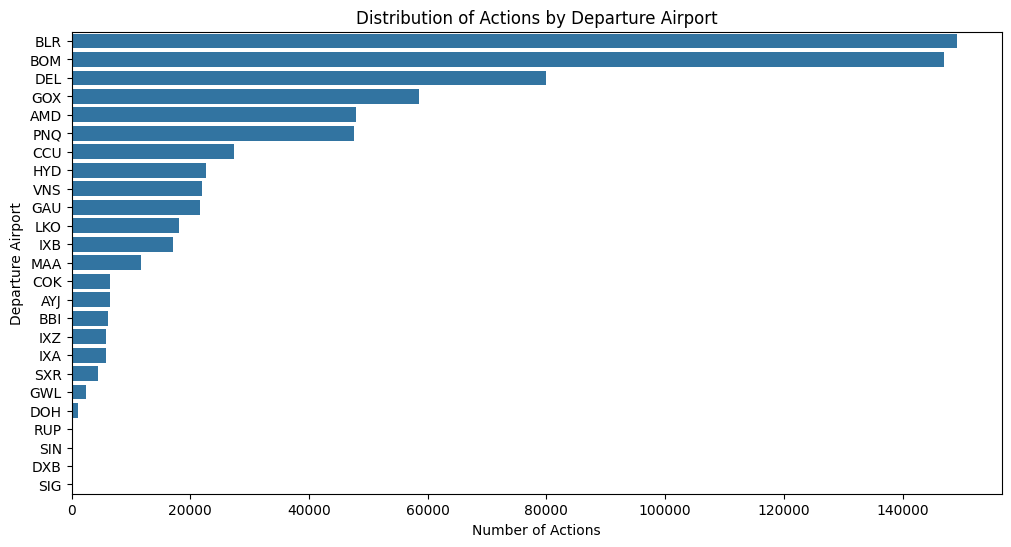

In [282]:
# Plot the distribution of departure airports
plt.figure(figsize=(12, 6))
sns.countplot(y='departure_airport', data=data_cleaned, order=data_cleaned['departure_airport'].value_counts().index)
plt.title('Distribution of Actions by Departure Airport')
plt.ylabel('Departure Airport')
plt.xlabel('Number of Actions')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

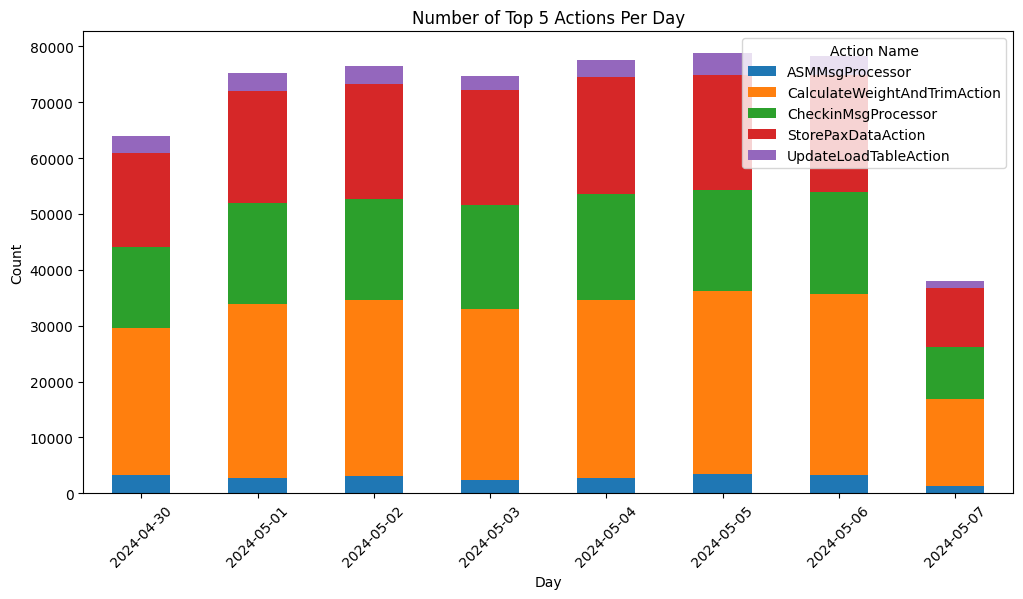

In [301]:
# Identify the top 5 most occurring actions
top_actions = data_cleaned['action_name'].value_counts().nlargest(5).index

# Filter data_cleaned to include only the top 5 actions
filtered_data = data_cleaned[data_cleaned['action_name'].isin(top_actions)]

# Resample data to day and sum the action counts
action_counts = filtered_data.groupby([filtered_data.index.date, 'action_name']).size().unstack(fill_value=0)

# Plot number of actions per day for the top 5 actions
plt.figure(figsize=(12, 6))
action_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Top 5 Actions Per Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Action Name')
plt.xticks(rotation=45)
plt.show()

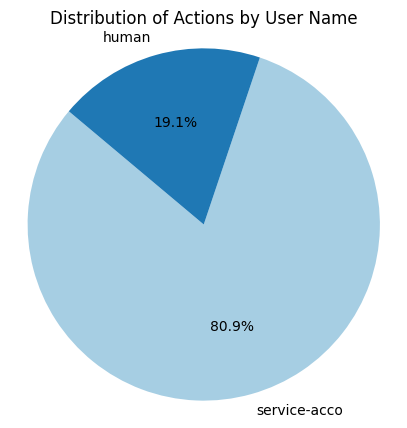

In [302]:
# Count the occurrences of each user_name
user_counts = data_cleaned['user_name'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Actions by User Name')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

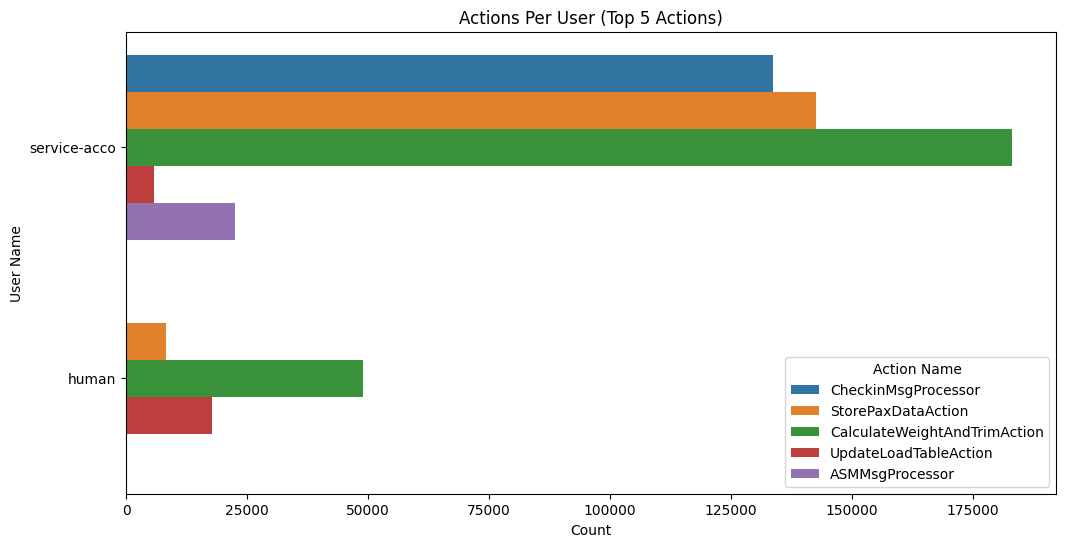

In [303]:
# Identify the top 5 most occurring actions
top_actions = data_cleaned['action_name'].value_counts().nlargest(5).index

# Filter data_cleaned to include only the top 5 actions
filtered_data = data_cleaned[data_cleaned['action_name'].isin(top_actions)]

# Plot actions per user for the top 5 actions
plt.figure(figsize=(12, 6))
sns.countplot(y='user_name', hue='action_name', data=filtered_data)
plt.title('Actions Per User (Top 5 Actions)')
plt.xlabel('Count')
plt.ylabel('User Name')
plt.legend(title='Action Name')
plt.show()

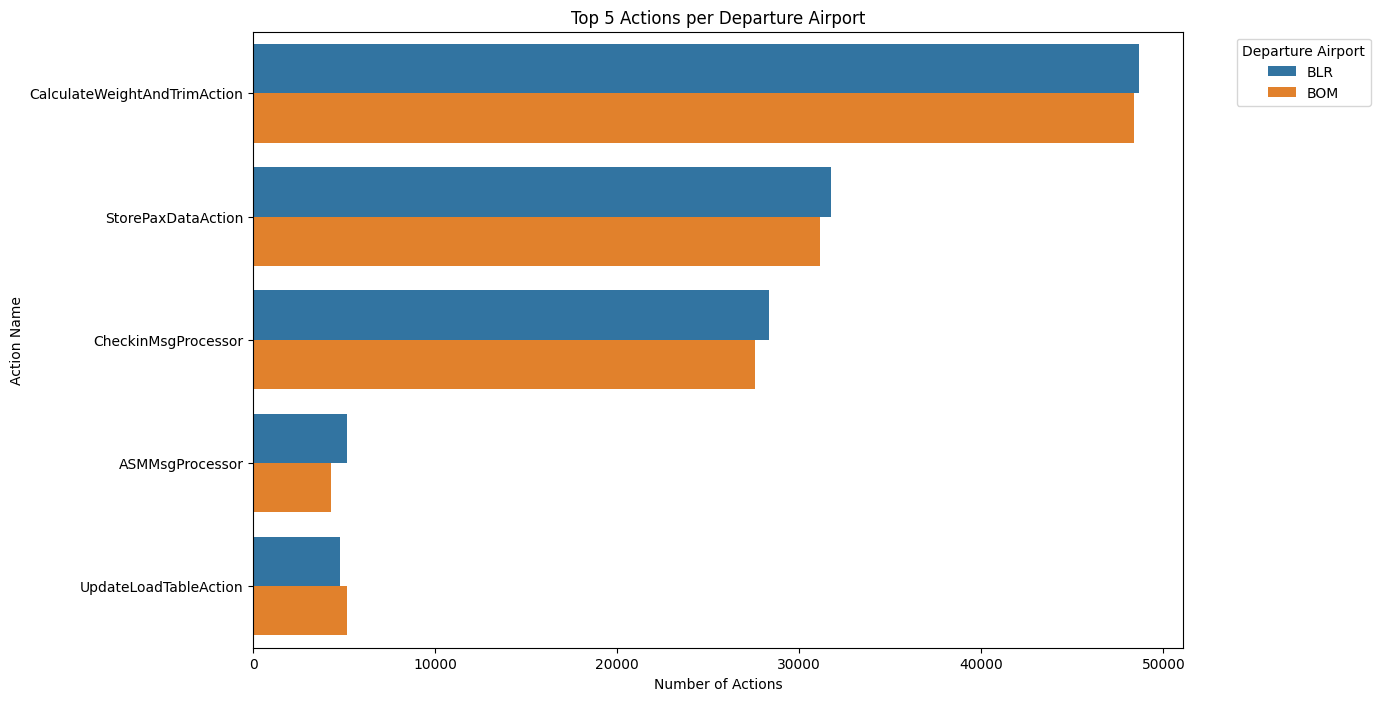

In [312]:
# Filter for two specific departure airports, e.g., 'BLR' and 'BOM'
filtered_airports = ['BLR', 'BOM']
df_filtered = data_cleaned[data_cleaned['departure_airport'].isin(filtered_airports)]

# Group by departure_airport and action_name, then count occurrences
action_counts = df_filtered.groupby(['departure_airport', 'action_name']).size().reset_index(name='count')

# Sort the counts in descending order and select the top 5 actions per departure_airport
top_actions = action_counts.sort_values(['departure_airport', 'count'], ascending=[True, False]).groupby('departure_airport').head(5)

# Visualize the top 5 actions per departure_airport
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='action_name', hue='departure_airport', data=top_actions, dodge=True)
plt.title('Top 5 Actions per Departure Airport')
plt.xlabel('Number of Actions')
plt.ylabel('Action Name')
plt.legend(title='Departure Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [106]:
# Enable tsmode to True to automatically identify time-series variables
# Provide the column name that provides the chronological order of your time-series
#profile = ProfileReport(data_short.head(), tsmode=True, title="Time-Series EDA")

#profile
#profile.to_file("report_timeseries.html")

In [ ]:
#data_short.to_feather("asien_tripfile_extracted_weights.feather")